<figure>
<IMG SRC="../lectures/images/PhysicsLogo.jpg" WIDTH=100 ALIGN="right">
</figure>
# [Physics 411](http://jklymak.github.io/Phy411/) Time Series Analysis
*Jody Klymak*




# Assignment 6 
Daniel Scanks
V00788200

### Error bounds on coherence estimates

<div style='background:#F0F0F0'>  The 95% confidence intervals for the coherence squared $\gamma^2_{xy}(f)$ between two variables $x(t)$ and $y(t)$ are approximately:
$$ \gamma^2_{xy} \pm \frac{\sqrt{2}\left(1+\gamma^2_{xy}\right)}{\left|\gamma_{xy} \right|\sqrt{n_d}}$$
where $n_d$ is the number of blocks used to calculate the coherence.  

You **may** use `matplotlib.mlab.csd` for the following question, but you had best use it correctly!
</div>

<div style='background:#F0F0F0'>**1** Make an input process $x(t)$ as random Gaussian noise, and the output process the sum of a noise source and a running average of the input: $y(t)=n(t)+\frac{1}{b}\int_{t-b}^t x(t')dt'$ and plot (Zoom so we can see whats going on, and label your plot).  Make sure you generate a large time series.</div> 

(10000L,)
(10000L,)


<IPython.core.display.Javascript object>


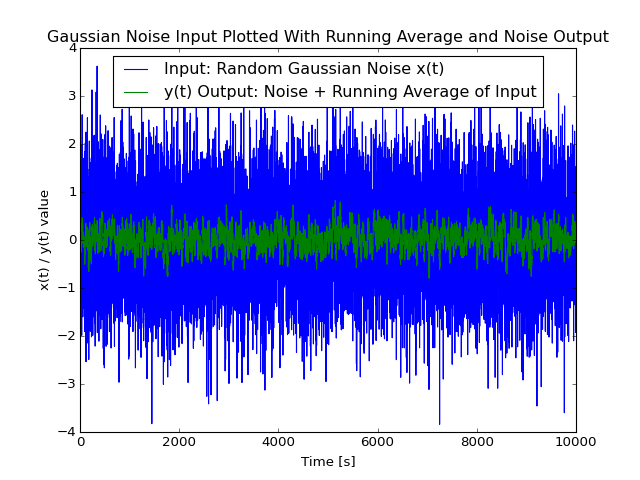

(10000L,)
(10000L,)


<IPython.core.display.Javascript object>


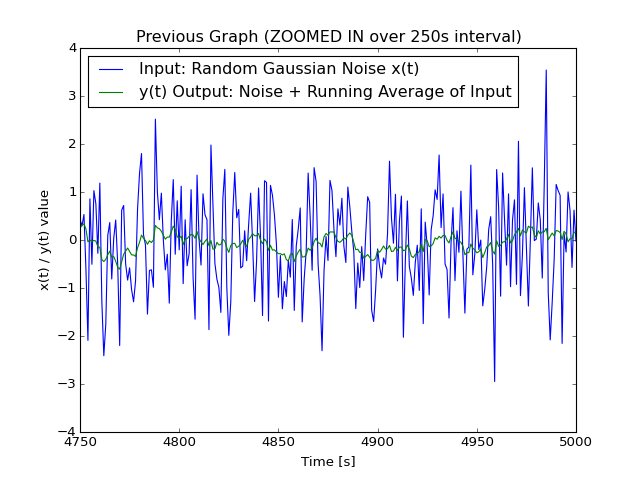

In [8]:
import numpy.random as random
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib nbagg

N = 10000 #input process length (hopefully 10000 is considered long)
x = np.random.randn(N) #input process (Guassian noise)
t = np.arange(N)
b = 20. 
y = (x/b) + (1/b)*(np.convolve(x, np.ones(b), mode = 'same'))
    #n         #integral

#graph    
print np.shape(t)
print np.shape(y)
fig =plt.figure(figsize = (8, 6))
ax = fig.add_subplot(1,1,1)
ax.plot(t, x, label = 'Input: Random Gaussian Noise x(t)')
ax.plot(t, y, label = 'y(t) Output: Noise + Running Average of Input')
ax.set_xlabel ('Time [s]')
ax.set_ylabel('x(t) / y(t) value')
ax.set_title('Gaussian Noise Input Plotted With Running Average and Noise Output')
ax.legend(loc = 'best')

#Zoomed Graph
print np.shape(t)
print np.shape(x)
fig =plt.figure(figsize = (8, 6))
ax = fig.add_subplot(1,1,1)
ax.plot(t, x, label = 'Input: Random Gaussian Noise x(t)')
ax.plot(t, y, label = 'y(t) Output: Noise + Running Average of Input')
ax.set_xlim(4750, 5000)
ax.set_xlabel ('Time [s]')
ax.set_ylabel('x(t) / y(t) value')
ax.set_title('Previous Graph (ZOOMED IN over 250s interval)')
ax.legend(loc = 'best')

<div style='background:#F0F0F0'>**2** Compute the coherence squared of the input and the output.  Make a plot with the spectra in the upper panel and the coherence squared in the middle panel and the phase in the bottom.

You will need to choose a value for your fft length.  Choose a relative low one to get a smooth plot.
</div>

chose nfft of 200 for following graphs


<IPython.core.display.Javascript object>


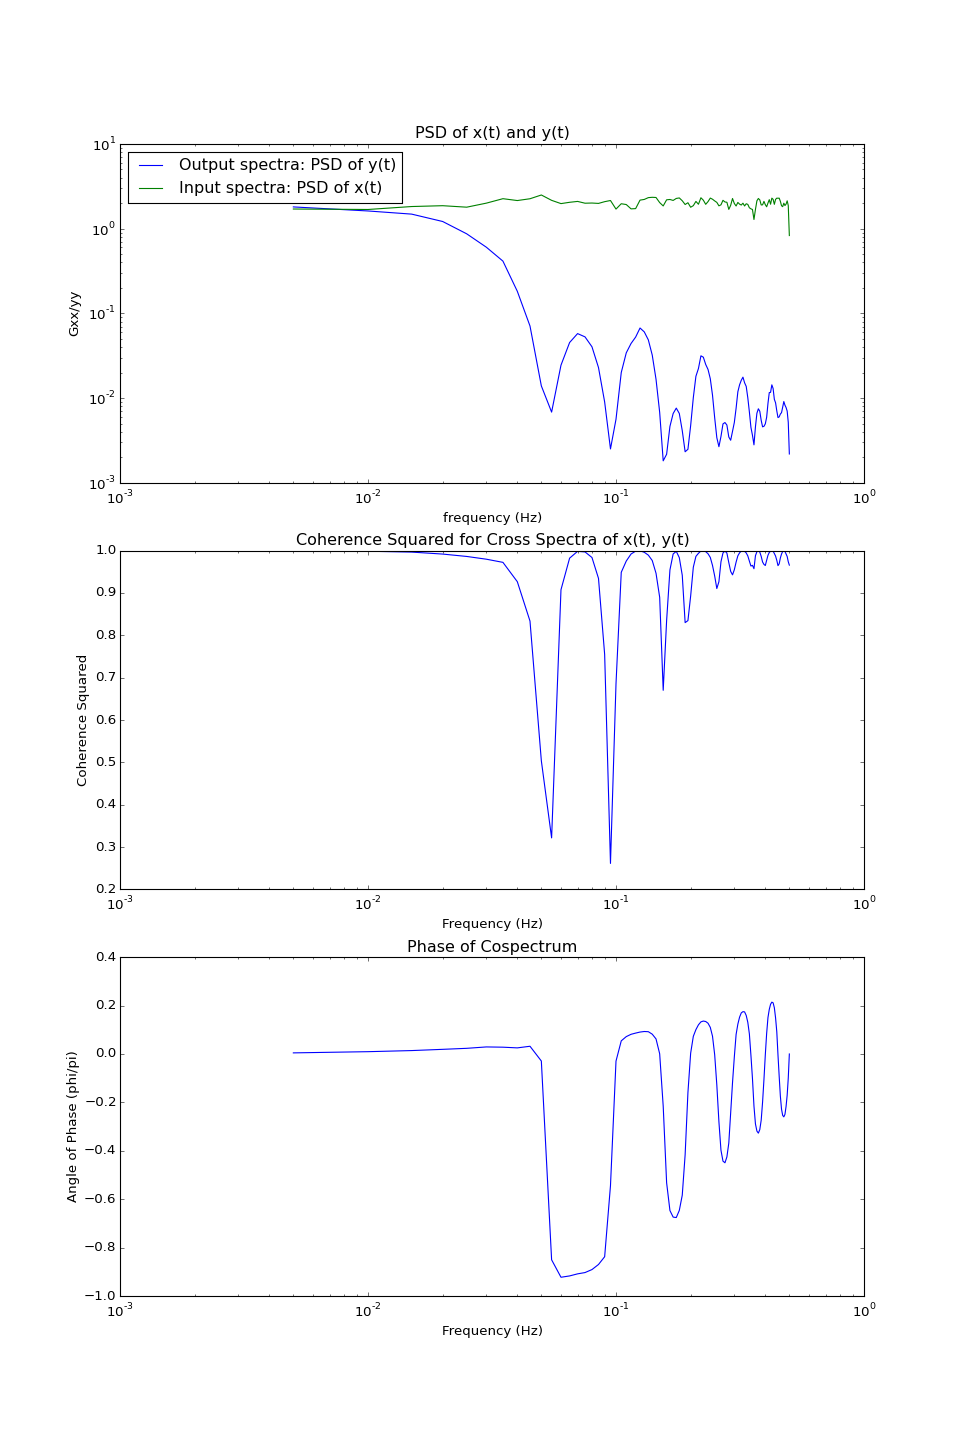

In [18]:
#y(t)=n(t)+L(x(t))
nfft = 200 #lower than default 
print('chose nfft of 200 for following graphs')
Gyy, fyy = mlab.psd(y, NFFT = nfft, Fs = 1, noverlap = nfft/2) #spectrum for yy, output
Gxx, fxx = mlab.psd(x,NFFT = nfft, Fs = 1, noverlap = nfft/2) #spectrum xx, input
Gxy, fxy = mlab.csd(y,x, NFFT = nfft, Fs = 1, noverlap = nfft/2) #cross spectrum
 
gammasquared = (np.absolute(Gxy)**2)/(Gxx*Gyy) #coherence squared for x,y
phase = np.arctan2(np.imag(Gxy),np.real(Gxy))/np.pi #phase angle  

#plots
fig = plt.figure(figsize=(12,18))
ax1 = fig.add_subplot(3,1,1)
ax1.loglog(fyy,Gyy, label = 'Output spectra: PSD of y(t)')
ax1.loglog(fxx,Gxx, label = 'Input spectra: PSD of x(t)')
ax1.set_title('PSD of x(t) and y(t)')
ax1.set_xlabel(r'frequency (Hz)')
ax1.set_ylabel('Gxx/yy')
ax1.legend(loc=0)

ax2 = fig.add_subplot(3,1,2)
ax2.semilogx(fxy,gammasquared)
ax2.set_title('Coherence Squared for Cross Spectra of x(t), y(t)')
ax2.set_ylabel('Coherence Squared')
ax2.set_xlabel('Frequency (Hz)')

ax3 = fig.add_subplot(3,1,3)
ax3.semilogx(fxy, phase)
ax3.set_title('Phase of Cospectrum ')
ax3.set_xlabel('Frequency (Hz)')
ax3.set_ylabel('Angle of Phase (phi/pi)')

Comments: 
As the PSD of Gyy and Gxx (output and input respectively) differe by larger amounts, the coherence squared becomes lower. When coherence squared is low, the phase difference if high. When the coherence is close to 1, the phase is close to zero (inverse relationship). 

<div style='background:#F0F0F0'>**3** Now repeat the above for three different values of NFFT, each 5 times as large as the next.  Plot the resulting coherence squared functions in separate panels.  Add the confidence intervals to your plot and comment on which peaks are significant.
</div>

<IPython.core.display.Javascript object>


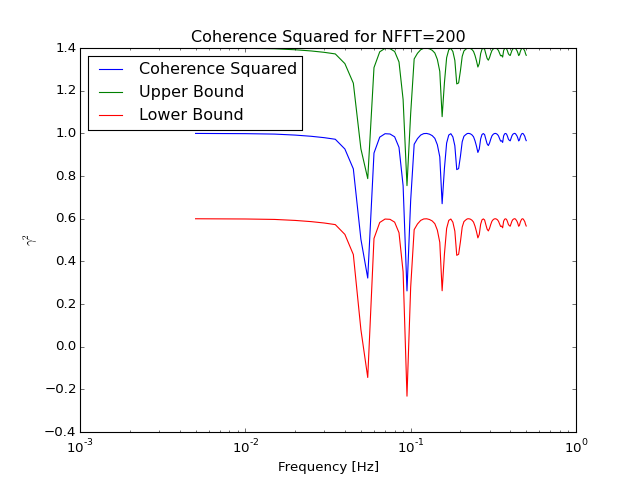

<IPython.core.display.Javascript object>


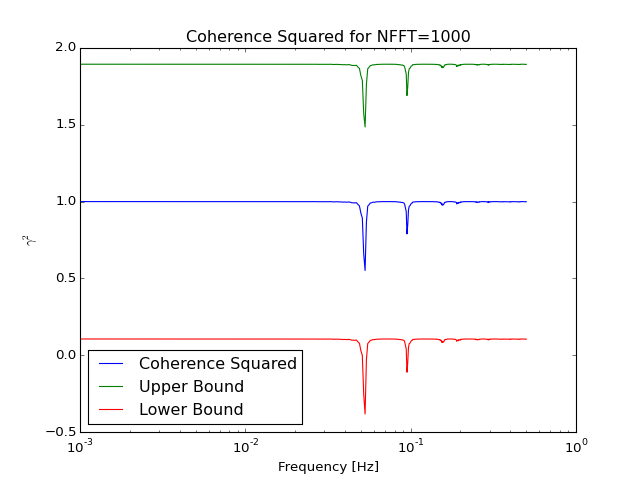

<IPython.core.display.Javascript object>


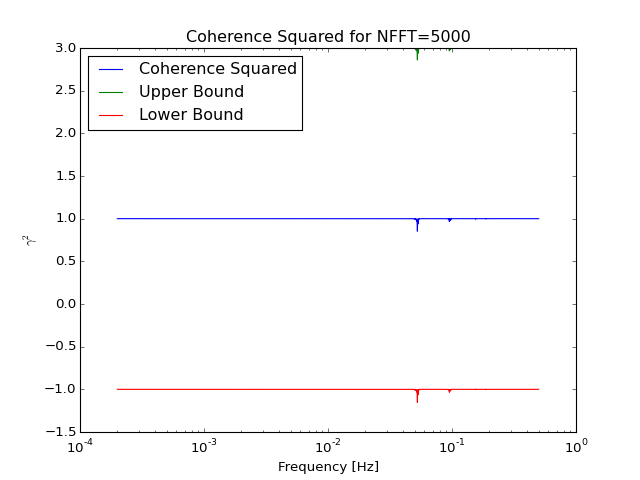

In [26]:
#1st nfft value
nfft = 200
Gyy, fyy = mlab.psd(y, NFFT = nfft, Fs = 1, noverlap = nfft/2) #spectrum for yy, output
Gxx, fxx = mlab.psd(x,NFFT = nfft, Fs = 1, noverlap = nfft/2) #spectrum xx, input
Gxy, fxy = mlab.csd(y,x, NFFT = nfft, Fs = 1, noverlap = nfft/2) #cross spectrum
gammasquared = (np.absolute(Gxy)**2)/(Gxx*Gyy) #coherence squared for x,y
#making bounds
b = np.sqrt(2)*(1+gammasquared)/(abs(np.sqrt(gammasquared))*np.sqrt(len(x)/nfft)) #term +/- to coherence^2
upperb = gammasquared + b
lowerb = gammasquared - b
#plot
fig =plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.semilogx(fxy,gammasquared, label = 'Coherence Squared')
ax.semilogx(fxy,upperb, label = 'Upper Bound')
ax.semilogx(fxy,lowerb, label ='Lower Bound')
ax.set_xlabel ('Frequency [Hz]')
ax.set_ylabel(r'$\gamma^{2}$')
ax.set_title('Coherence Squared for NFFT=200')
ax.legend(loc = 'best')


#2nd nfft value
nfft = 1000
Gyy, fyy = mlab.psd(y, NFFT = nfft, Fs = 1, noverlap = nfft/2) #spectrum for yy, output
Gxx, fxx = mlab.psd(x,NFFT = nfft, Fs = 1, noverlap = nfft/2) #spectrum xx, input
Gxy, fxy = mlab.csd(y,x, NFFT = nfft, Fs = 1, noverlap = nfft/2) #cross spectrum
gammasquared = (np.absolute(Gxy)**2)/(Gxx*Gyy) #coherence squared for x,y
#making bounds
b = np.sqrt(2)*(1+gammasquared)/(abs(np.sqrt(gammasquared))*np.sqrt(len(x)/nfft)) #term +/- to coherence^2
upperb = gammasquared + b
lowerb = gammasquared - b
#plot
fig =plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.semilogx(fxy,gammasquared, label = 'Coherence Squared')
ax.semilogx(fxy,upperb, label = 'Upper Bound')
ax.semilogx(fxy,lowerb, label ='Lower Bound')
ax.set_xlabel ('Frequency [Hz]')
ax.set_ylabel(r'$\gamma^{2}$')
ax.set_title('Coherence Squared for NFFT=1000')
ax.legend(loc = 'best')

nfft = 5000
Gyy, fyy = mlab.psd(y, NFFT = nfft, Fs = 1, noverlap = nfft/2) #spectrum for yy, output
Gxx, fxx = mlab.psd(x,NFFT = nfft, Fs = 1, noverlap = nfft/2) #spectrum xx, input
Gxy, fxy = mlab.csd(y,x, NFFT = nfft, Fs = 1, noverlap = nfft/2) #cross spectrum
gammasquared = (np.absolute(Gxy)**2)/(Gxx*Gyy) #coherence squared for x,y
#making bounds
b = np.sqrt(2)*(1+gammasquared)/(abs(np.sqrt(gammasquared))*np.sqrt(len(x)/nfft)) #term +/- to coherence^2
upperb = gammasquared + b
lowerb = gammasquared - b
#plot
fig =plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.semilogx(fxy,gammasquared, label = 'Coherence Squared')
ax.semilogx(fxy,upperb, label = 'Upper Bound')
ax.semilogx(fxy,lowerb, label ='Lower Bound')
ax.set_xlabel ('Frequency [Hz]')
ax.set_ylabel(r'$\gamma^{2}$')
ax.set_title('Coherence Squared for NFFT=5000')
ax.legend(loc = 'best')

Comments:
Larger NFFT values increase the size of the confidence bounds on the data, and less peaks are resolved. The significant peaks occur between 0 and 1 values for coherence squared. For NFFT= 200 many significant peaks occur at (0.055,0.095,0.155,0.190)Hz.
At NFFT = 1000, only two significant (0.055,0.095)Hz and for NFFT = 5000 only one significant peak is shown (0.055Hz). Mathmatically, the significant peaks should only be considered reasonably accurate if the error bounds are within (0,1 coherence squared) and so higher NFFT values give less accurate coherence squared peaks. This is because High NFFT values make the denominator small in the bounds calculation, thereby making the bounds large.

## Q2: Shear turbulence data

In [75]:
time=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/time.txt')
ac=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/ac.txt')
shear=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/s.txt')


<div style='background:#F0F0F0'>Download the data abaove. `time` is a measurement time in seconds. `shear` is a little less than 300 s of data from a turbulence shear probe. Units are $s^{-1}$. `ac` is a suitably scaled acceleration of the vehicle containing the shear probes.

**1** Plot the shear time series and the accelerometer time series.  Comment on any similarities and differences.  Comment on the stationarity of the time series.

<IPython.core.display.Javascript object>


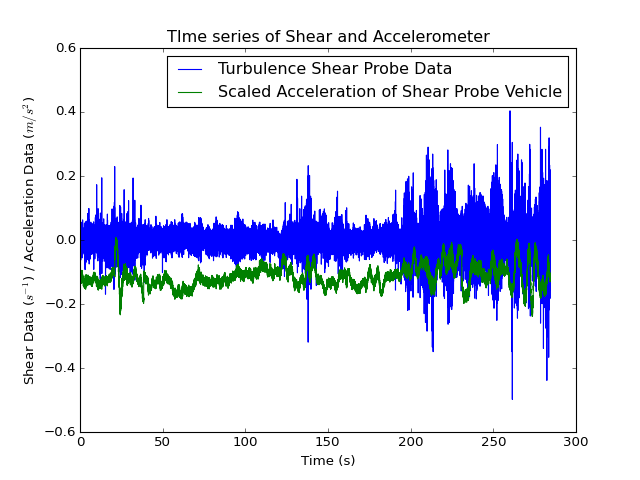

In [76]:
fig= plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(time, shear, label = 'Turbulence Shear Probe Data')
ax.plot(time, ac, label = 'Scaled Acceleration of Shear Probe Vehicle')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Shear Data ($s^{-1}$) / Acceleration Data ($m/s^{2}$)')
ax.set_title('TIme series of Shear and Accelerometer')
ax.legend()

Comments:
Both the shear data and the acceleration data appear to have similar peaks and troughs, however the acceleration data appears to have significantly less noise on the signal. The overall trend of the two time series is roughly the same. Both remain relitively stationary until ~200s where the data fluctuates more rapidly. 

<div style='background:#F0F0F0'> **2** Compute the power spectra of the two signals and the coherence squared (you could do the phase too, but it is not too thrilling).  Comment on the spectral similarities and the coherence.  

44434
44434


<IPython.core.display.Javascript object>


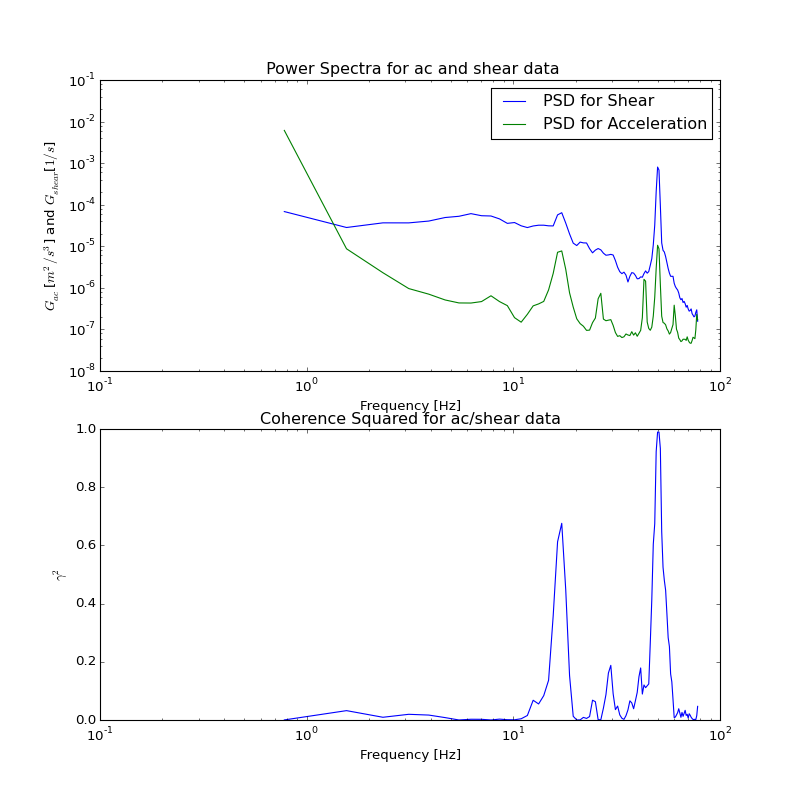

In [77]:
#shear power spectra 
print len(shear) #number of values in 285s(observed on graph) of data so...
FsShear = 1.*len(shear)/285 #sampling f
PSDshear, fshear = mlab.psd(shear, NFFT=200, Fs = FsShear)
#acceleration power spectra
print len(ac) #same as shear
PSDac, fac = mlab.psd(ac, NFFT =200, Fs = FsShear)
#cross spectra
CSDshearac, fcross = mlab.csd(ac, shear, NFFT = 200, Fs = FsShear)
#coherence squared
gammasquared = np.abs(CSDshearac)**2/(PSDshear*PSDac)

#plots
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(2, 1, 1)
ax1.loglog(fshear, PSDshear, label = 'PSD for Shear')
ax1.loglog(fac, PSDac, label = 'PSD for Acceleration')
ax1.set_xlabel ('Frequency [Hz]')
ax1.set_ylabel(r'$G_{ac}$ [$m^{2}/s^{3}$] and $G_{shear}$[$1/s$]')
ax1.set_title(' Power Spectra for ac and shear data')
ax1.legend()

ax2 = fig.add_subplot(2, 1, 2)
ax2.semilogx(fcross,gammasquared, label = 'Coherence Squared')
ax2.set_xlabel ('Frequency [Hz]')
ax2.set_ylabel(r'$\gamma^{2}$')
ax2.set_title('Coherence Squared for ac/shear data')

Comments:
At frequencies < 10Hz the coherence squared between ac and shear data is low (practically 0). Frequencies > 10Hz show similar peaks in PSD for ac and shear data, and at those peaks, the coherence squared between them is very high. 

<div style='background:#F0F0F0'> **3** Compute a spectra that has the contamination from the vibration removed. Comment on how well your correction worked.

<IPython.core.display.Javascript object>


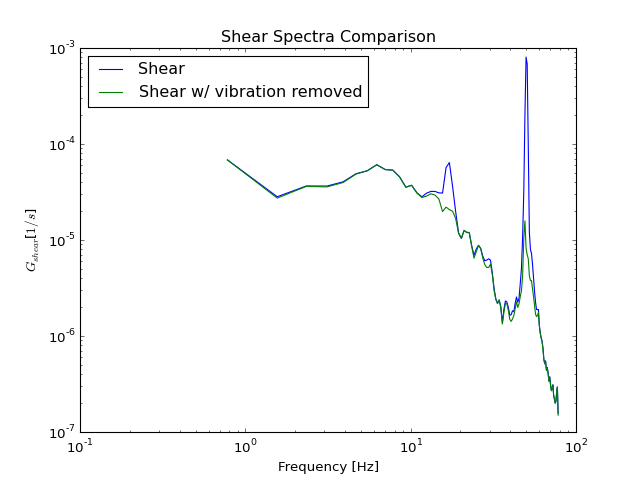

In [78]:
#reducing vibration contamination
Gnn = PSDshear-((np.abs(CSDshearac)**2)/PSDac)

#plot to compare
fig =plt.figure(figsize = (8, 6))
ax = fig.add_subplot(1, 1, 1)
ax.loglog(fshear, np.abs(PSDshear), label = 'Shear')
ax.loglog(fshear, np.abs(Gnn), label = 'Shear w/ vibration removed')
ax.set_xlabel ('Frequency [Hz]')
ax.set_ylabel(r'$G_{shear}$[$1/s$]')
ax.set_title('Shear Spectra Comparison')
ax.legend(loc = 'best')


Comment:
Correction greatly reduced noise, but also reduced the peak amplitude significantly.(removed noise from acceleration)

<div style='background:#F0F0F0'>**4** Chose two separate periods of the time series, one that is "turbulent" and one that is "quiet", and plot the raw and corrected shear spectra.  Comment on the differences and the effect of the correction on each spectral estimate.    

<IPython.core.display.Javascript object>


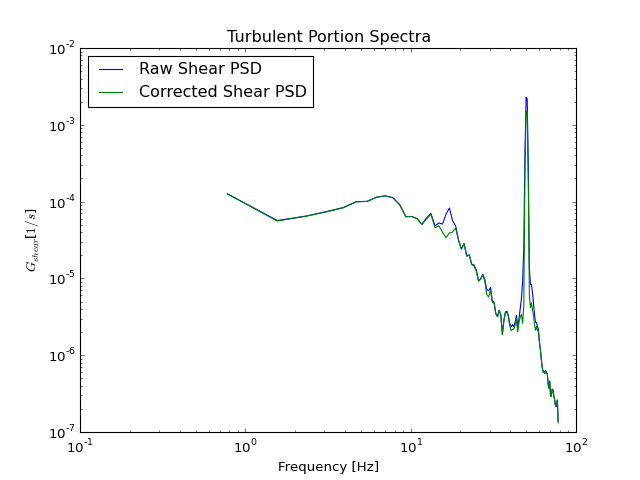

<IPython.core.display.Javascript object>


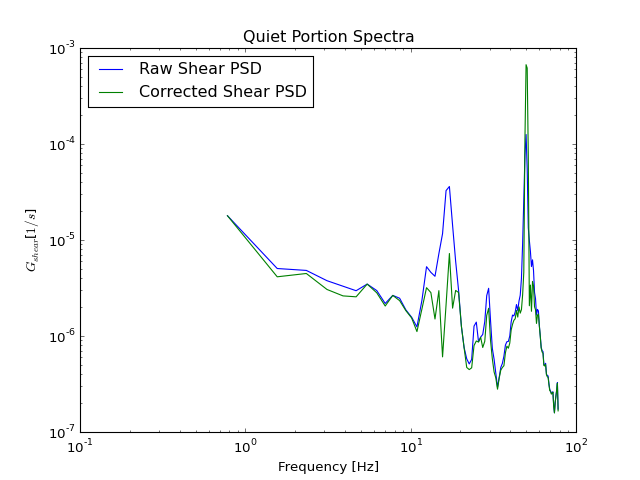

In [79]:

#turbulent portion (200-280s)
startpoint = np.floor(200*FsShear)
endpoint = np.floor(280*FsShear)
startpoint = int(startpoint)
endpoint = int(endpoint)
shear1 = shear[startpoint:endpoint]
PSDshear, fshear = mlab.psd(shear1, NFFT=200, Fs = FsShear)
Gnn = PSDshear-((np.abs(CSDshearac)**2)/PSDac)

fig =plt.figure(figsize = (8, 6))
ax = fig.add_subplot(1, 1, 1)
ax.loglog(fshear, np.abs(PSDshear), label = 'Raw Shear PSD')
ax.loglog(fshear,np.abs(Gnn), label = 'Corrected Shear PSD')
ax.set_xlabel ('Frequency [Hz]')
ax.set_ylabel(r'$G_{shear}$[$1/s$]')
ax.set_title('Turbulent Portion Spectra')
ax.legend(loc = 'best')


#quiet portion (40-120s)
startpoint = np.floor(40*FsShear)
endpoint = np.floor(120*FsShear)
startpoint = int(startpoint)
endpoint = int(endpoint)
shear2 = shear[startpoint:endpoint]
PSDshear, fshear = mlab.psd(shear2, NFFT=200, Fs = FsShear)
Gnn = PSDshear-((np.abs(CSDshearac)**2)/PSDac)

fig =plt.figure(figsize = (8, 6))
ax = fig.add_subplot(1, 1, 1)
ax.loglog(fshear, np.abs(PSDshear), label = 'Raw Shear PSD')
ax.loglog(fshear,np.abs(Gnn), label = 'Corrected Shear PSD')
ax.set_xlabel ('Frequency [Hz]')
ax.set_ylabel(r'$G_{shear}$[$1/s$]')
ax.set_title('Quiet Portion Spectra')
ax.legend(loc = 'best')


Comments:

The turbulent spectra: has one very distinct peak, and the corrected shear PSD eliminates most noise while still showing this peak. The peak is very narrow in frequency. The raw turbulent PSD is close to the corrected PSD (less noise than quiet PSD).

The quiet spectra: there are several large peaks in the raw PSD graph, and the peaks are all wider in frequency than the turbulent spectra. With the correction applied, the two of the larger peaks are reduced, but the main peak is actually amplified ( main peak at ~50Hz). It appears the quieter spectrum has a more "noisy" PSD. This makes sense because the turbulent portion of the spectrum should provide a stonger signal and the PSD peak will appear more distinct.